In [1]:
options(repr.plot.width=8, repr.plot.height=5, jupyter.plot_mimetypes='image/svg+xml')
source('common.r')
out <- function(obj) write(obj, stdout())

# Raw Mix

In [43]:
source('common.r')
d <- data.ipa.rawmix(where="datatype='counter' and ipa_duration=60 and (ipa_version = 'v2.1' or ipa_version = 'v3.1')")
out("data:   " + nrow(d))

d$grp <- d$bound
d$facet <- factor(d$honeycomb_mode)
d$x <- d$load

d$inconsistent <- d$counters_inconsistent_count
d$consistent <- d$counters_consistent_count
d$inconsistent_fraction <- d$inconsistent / (d$inconsistent + d$consistent)

d$fraction_immediate <- d$res_immediates_total / d$res_incrs_total

d$overall_latency_mean <- 
    d$timers_read_latency_mean * num(d$ipa_rawmix_counter_mix_read) + 
    d$timers_incr_latency_mean * num(d$ipa_rawmix_counter_mix_incr)

d$overall_rate_mean <- d$timers_read_latency_mean_rate + d$timers_incr_latency_mean_rate

s <- subset(d, 
  #  grepl('normal|slowpoke_flat', honeycomb_mode)
  # & mix == 'no_size' & grepl('\\{.*\\}', containers)
 grepl('(con|lat)|v3.1#tol', x(ipa_version,ipa_bound))
 & (!grepl('tol', ipa_bound) | ipa_lease_period == '200ms' & ipa_reservations_lease == '10s')
)
out("subset: " + nrow(s))

The following `from` values were not present in `x`: world#512
The following `from` values were not present in `x`: consistency:strongwrite


data:   1134
subset: 843


In [72]:
#sql("SELECT load, ipa_bound, honeycomb_mode, round(res_cass_op_lat_mean,2) as cass_op, round(res_weak_read_lat_mean,2) as weak_read, round(res_strong_read_lat_mean,2) as strong_read, round(res_weak_write_lat_mean,2) as weak_write, round(res_cached_read_lat_mean,2) as strong_write FROM s WHERE ipa_bound LIKE '%tolerance%' ORDER BY honeycomb_mode")

In [ ]:
sql("SELECT load, ipa_bound, honeycomb_mode as honeycomb, ip")

In [16]:
sql("SELECT load, ipa_bound, honeycomb_mode as honeycomb, round(timers_read_latency_mean,2) as mean_lat, round(avg(res_immediates_total/res_incrs_total),3) as immed, round(avg(res_refreshes_total/res_incrs_total),3) as refresh, round(avg(res_out_of_bounds_total/res_incrs_total),3) as obounds, res_incrs_total as incrs, round(avg(res_cached_reads_total/res_reads_total),3) as cached FROM s WHERE ipa_bound LIKE '%tolerance%' and ipa_lease_period = '200ms' GROUP BY load, ipa_bound, honeycomb ORDER BY honeycomb_mode")

,load,ipa_bound,honeycomb,mean_lat,immed,refresh,obounds,incrs,cached
1,128,tolerance:0.05,amazon,198.04,0.081,0.125,0.739,5197,0.2
2,128,tolerance:0.1,amazon,190.28,0.12,0.266,0.511,5406,0.202
3,512,tolerance:0.05,amazon,286.14,0.248,0.283,0.301,16964,0.226
4,512,tolerance:0.1,amazon,283.09,0.305,0.334,0.13,17214,0.214
5,2048,tolerance:0.05,amazon,1395.29,0.09,0.286,0.328,15712,0.006
6,2048,tolerance:0.1,amazon,1291.31,0.116,0.348,0.141,15504,0.017
7,4096,tolerance:0.05,amazon,2741.24,0.057,0.255,0.303,16504,0.004
8,4096,tolerance:0.1,amazon,2539.67,0.062,0.305,0.127,17314,0.004
9,128,tolerance:0.05,google,222.27,0.071,0.127,0.746,4981,0.123
10,128,tolerance:0.1,google,222.61,0.109,0.266,0.504,5235,0.135


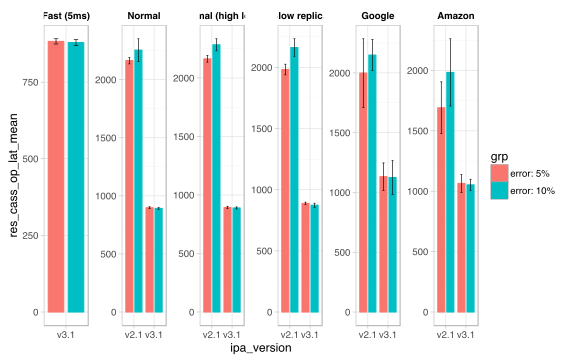

In [45]:
source('common.r')

ggplot(subset(d, !is.na(condition) & ipa_lease_period == '200ms' & grepl('tol', ipa_bound)), aes(
#    y = overall_latency_mean,
#    y = timers_read_latency_mean,
    y = res_cass_op_lat_mean,
    x=ipa_version, color=grp, fill=grp, group=grp
))+
    #stat_summary(geom='bar', fun.y=mean, size=0.5, width=0.7)+
    geom_meanbar(barwidth=0.7, position=position_dodge(width = 0.9))+
#     ggtitle('Mean latency')+
#     xlab('load (concurrent requests)')+
#     ylab('Latency (ms)')+
    facet_wrap(~condition, ncol=6, scale="free")+
    theme_mine()
#    theme.bar()
#    ipa.scales()

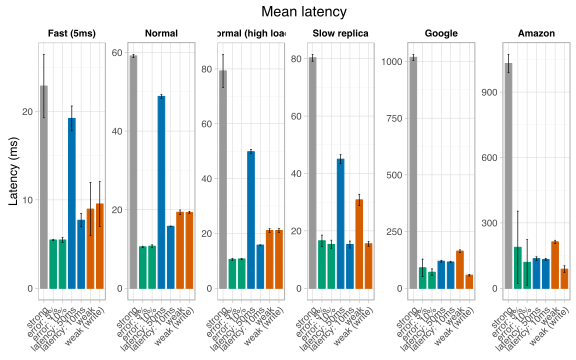

In [46]:
source('common.r')

ggplot(subset(s, !is.na(condition)), aes(
#    y = overall_latency_mean,
    y = timers_read_latency_mean,
    x=grp, color=grp, fill=grp, group=grp
))+
    #stat_summary(geom='bar', fun.y=mean, size=0.5, width=0.7)+
    geom_meanbar()+
    ggtitle('Mean latency')+
    xlab('load (concurrent requests)')+
    ylab('Latency (ms)')+
    facet_wrap(~condition, ncol=6, scale="free")+
    theme_mine()+
    theme.bar()+
    ipa.scales()

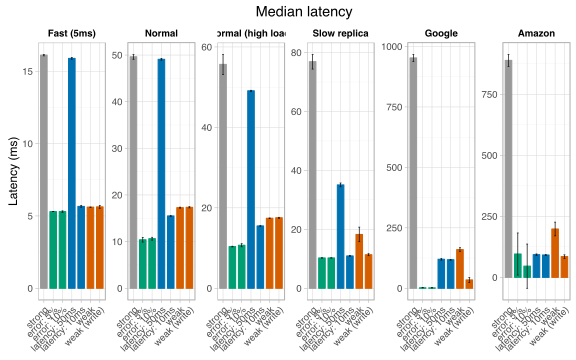

In [47]:
source('common.r')

ggplot(subset(s, !is.na(condition)), aes(
#    y = value,
#    y = overall_latency_mean,
    y = timers_read_latency_p50,
    x=grp, color=grp, fill=grp, group=grp
))+
    #stat_summary(geom='bar', fun.y=mean, size=0.5, width=0.7)+
    geom_meanbar()+
    ggtitle('Median latency')+
    xlab('load (concurrent requests)')+
    ylab('Latency (ms)')+
    facet_wrap(~condition, ncol=6, scale="free")+
    theme_mine()+
    theme.bar()+
    ipa.scales()

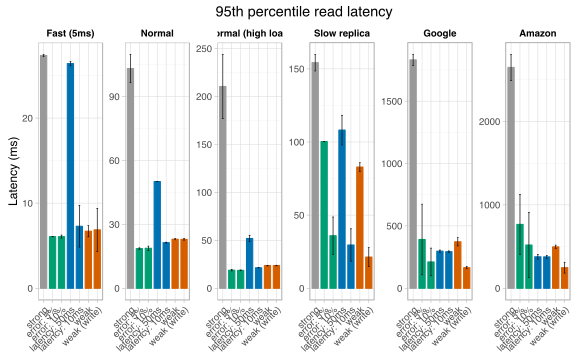

In [49]:
source('common.r')

ggplot(subset(s, !is.na(condition)), aes(
    y = timers_read_latency_p95,
    x=grp, color=grp, fill=grp, group=grp
))+
    geom_meanbar()+ #stat_summary(geom='bar', fun.y=mean, size=0.5, width=0.7)+
    ggtitle('95th percentile read latency')+
    ylab('Latency (ms)')+
    facet_wrap(~condition, ncol=6, scale="free")+
    theme_mine()+
    theme.bar()+
    ipa.scales()

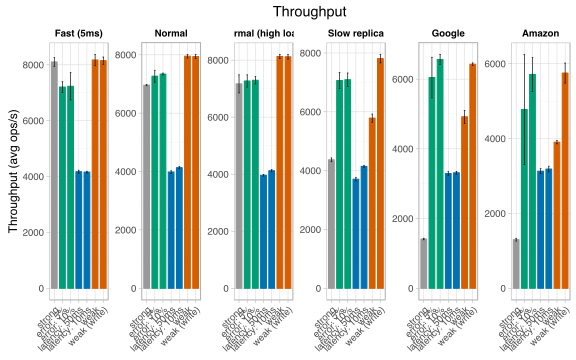

In [50]:
ggplot(subset(s, !is.na(condition)), aes(
    x=grp, y=overall_rate_mean, color=grp, fill=grp, group=grp
))+
    #stat_summary(geom='bar', fun.y=mean, width=0.7)+
    geom_meanbar()+
    ggtitle('Throughput')+
    ylab('Throughput (avg ops/s)')+
    facet_wrap(~condition, scale="free", ncol=6)+
    theme_mine()+
    theme.bar()+
    ipa.scales()

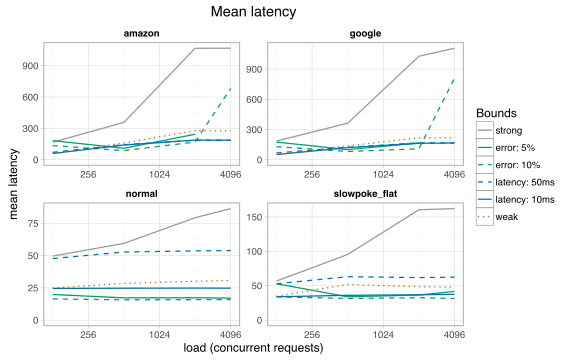

In [126]:
source('common.r')
ggplot(subset(s, x <= 4096), aes(
    x=x, y=overall_latency_mean, color=grp, fill=grp, linetype=grp, group=grp
))+
    stat_summary(geom='line', fun.y=mean, size=0.6)+
    ggtitle('Mean latency')+
    xlab('load (concurrent requests)')+
    ylab('mean latency')+
    scale_x_continuous(trans=log2_trans())+
    facet_wrap(~honeycomb_mode, scales="free")+
    theme_mine()+
    ipa.scales()

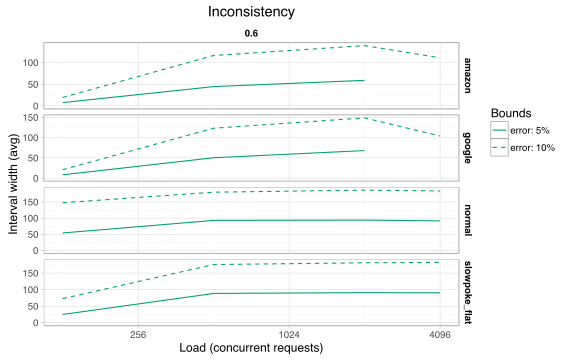

In [127]:
ggplot(subset(s, grepl('tolerance:',ipa_bound)), aes(
    x = x, y= histograms_interval_width_mean, color=grp, fill=grp, group=grp, linetype=grp
))+
    stat_summary(geom='line', fun.y=mean)+
    ggtitle('Inconsistency')+
    xlab('Load (concurrent requests)')+
    ylab('Interval width (avg)')+
    scale_x_continuous(trans=log2_trans())+
    facet_grid(honeycomb_mode~ipa_zipf, scales="free")+
    ipa.scales()+
    theme_mine()

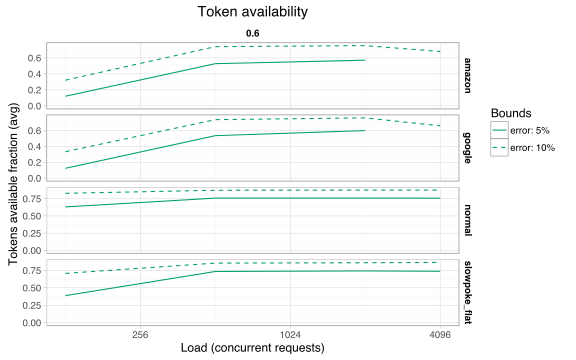

In [128]:
ggplot(subset(s, grepl('tolerance:',ipa_bound)), aes(
    x = x, y = fraction_immediate, color=grp, fill=grp, group=grp, linetype=grp
))+
    stat_summary(geom='line', fun.y=mean)+
    ggtitle('Token availability')+
    xlab('Load (concurrent requests)')+
    ylab('Tokens available fraction (avg)')+
    scale_x_continuous(trans=log2_trans())+
    facet_grid(honeycomb_mode~ipa_zipf, scales="free")+
    ipa.scales()+
    theme_mine()

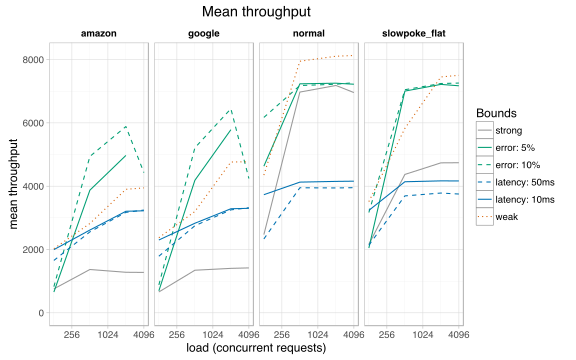

In [129]:
ggplot(subset(s, x <= 4096), aes(
    x=x, y=overall_rate_mean, color=grp, fill=grp, group=grp, linetype=grp
))+
    stat_summary(geom='line', fun.y=mean)+
    ggtitle('Mean throughput')+
    xlab('load (concurrent requests)')+
    ylab('mean throughput')+
    scale_x_continuous(trans=log2_trans())+
    facet_grid(~honeycomb_mode, scales="free")+
    ipa.scales()+
    theme_mine()

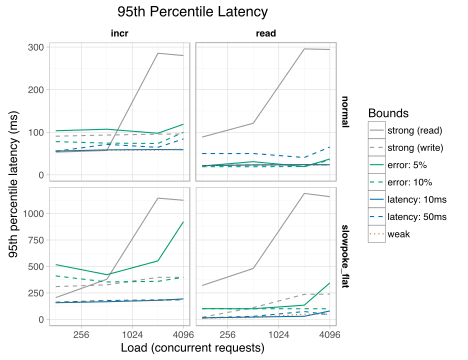

In [28]:
p = "95"
ggplot(melt.by(s, 'op', 'timers_(read|incr)_latency_p'+p+'$'), aes(
    x=x, y=value, color=grp, fill=grp, group=grp, linetype=grp
))+
    stat_summary(geom='line', fun.y=mean)+
    ggtitle(p+'th Percentile Latency')+
    xlab('Load (concurrent requests)')+
    ylab(p+'th percentile latency (ms)')+
    scale_x_continuous(trans=log2_trans())+
    facet_grid(honeycomb_mode~op, scale="free")+
    ipa.scales()+
    theme_mine()

In [66]:
r <- data.ipa.rawmix(where="datatype='counter' and ipa_duration=60 and ipa_version = 'v1.9' and ipa_bound LIKE 'tolerance%'")

The following `from` values were not present in `x`: world#128
The following `from` values were not present in `x`: consistency:strong, consistency:strongwrite, latency:50ms, latency:10ms, consistency:weak


In [67]:
sql("SELECT load, ipa_bound, honeycomb_mode, timers_read_latency_mean as mean_lat, round(res_immediates_total/res_incrs_total,4) as immed, round(res_refreshes_total/res_incrs_total,4) as refresh, round(res_out_of_bounds_total/res_incrs_total,4) as out_of_bounds, res_incrs_total as incrs FROM r WHERE ipa_bound LIKE '%tolerance%' ORDER BY honeycomb_mode")

,load,ipa_bound,honeycomb_mode,mean_lat,immed,refresh,out_of_bounds,incrs
1,128,tolerance:0.1,normal,10.90409,0.8386,0.1176,0.0438,76415
2,128,tolerance:0.05,normal,12.18976,0.6965,0.1765,0.127,72226
3,512,tolerance:0.1,normal,11.03484,0.8697,0.1085,0.0218,88337
4,512,tolerance:0.05,normal,10.8847,0.7507,0.1667,0.0826,87293
5,2048,tolerance:0.1,normal,11.01613,0.8684,0.1094,0.0222,86780
6,2048,tolerance:0.05,normal,10.69321,0.7458,0.1675,0.0868,86073
7,4096,tolerance:0.05,normal,11.13091,0.7507,0.1657,0.0837,87104
8,128,tolerance:0.1,normal,10.763,0.84,0.1184,0.0416,75474
9,128,tolerance:0.05,normal,10.76421,0.7082,0.174,0.1178,75021
10,512,tolerance:0.1,normal,11.09122,0.8688,0.1102,0.021,85528


# Retwis

In [ ]:
d <- data.or.csv(
    csv = 'data/owl.csv',
    gen = function() data.owl()
)

In [ ]:
subset(d, duration == 60 & blockade == 'slow', select=c('c_reqs','ipa_consistency','op_rate'))

In [ ]:
d$x <- d$c_reqs
d$grp <- d$ipa_consistency
s <- subset(d, duration == 60 & blockade == 'slow' & !is.na(ipa_consistency))

ggplot(s, aes(x=x, y=op_rate, color=grp, fill=grp, group=grp))+
    stat_summary(geom='line', fun.y=mean)+
    xlab('system load (# concurrent requests)')+
    ylab('mean cassandra op latency (ms)')+
    my_theme()

In [ ]:
ggplot(s, aes(x=x, y=op_lat_mean, color=grp, fill=grp, group=grp))+
    stat_summary(geom='line', fun.y=mean)+
    xlab('system load (# concurrent requests)')+
    ylab('mean cassandra op latency (ms)')+
    my_theme()